<a href="https://colab.research.google.com/github/haresh93/ERA-submissions/blob/main/S8/BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch
!pip3 install torchvision
!pip3 install matplotlib
!pip3 install torchsummary
!pip3 install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [3]:
cuda = torch.cuda.is_available()
print("Cuda Available: ", cuda)

device = torch.device("cuda" if cuda else "cpu")

Cuda Available:  True


In [4]:
# Train and Test Transforms
train_transforms = transforms.Compose([
        transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize( (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

test_transforms = transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize( (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

In [5]:
# Train and Test Datasets
train_dataset = datasets.CIFAR10('../data', train=True, download=True,
                    transform=train_transforms)
test_dataset = datasets.CIFAR10('../data', train=False, download=True,
                    transform=test_transforms)

100%|██████████| 170498071/170498071 [00:03<00:00, 48626144.96it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


In [6]:
dataloader_args = dict(shuffle = True, batch_size = 128, num_workers = 4, pin_memory = True)

train_dataloader = torch.utils.data.DataLoader(train_dataset, **dataloader_args)

test_dataloader = torch.utils.data.DataLoader(test_dataset, **dataloader_args)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [7]:
from model import model_summary, NetBN

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = NetBN().to(device)

model_summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             224
       BatchNorm2d-2            [-1, 8, 32, 32]              16
              ReLU-3            [-1, 8, 32, 32]               0
           Dropout-4            [-1, 8, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           1,168
       BatchNorm2d-6           [-1, 16, 32, 32]              32
              ReLU-7           [-1, 16, 32, 32]               0
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9            [-1, 8, 34, 34]             136
      BatchNorm2d-10            [-1, 8, 34, 34]              16
             ReLU-11            [-1, 8, 34, 34]               0
          Dropout-12            [-1, 8, 34, 34]               0
        MaxPool2d-13            [-1, 8, 17, 17]               0
           Conv2d-14           [-1, 16,

In [8]:
from model import NetBN, model_train, model_test, draw_graphs, plot_misclassified_images
model =  NetBN().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    model_train(model, device, train_dataloader, optimizer, epoch)
    model_test(model, device, test_dataloader)

EPOCH: 0


Train: Loss=1.3753 Batch_id=390 Accuracy=39.24: 100%|██████████| 391/391 [00:30<00:00, 12.79it/s]



Test set: Average loss: 1.3702, Accuracy: 4939/10000 (49.39%)

EPOCH: 1


Train: Loss=1.4513 Batch_id=390 Accuracy=52.99: 100%|██████████| 391/391 [00:32<00:00, 12.04it/s]



Test set: Average loss: 1.1841, Accuracy: 5753/10000 (57.53%)

EPOCH: 2


Train: Loss=1.1300 Batch_id=390 Accuracy=58.00: 100%|██████████| 391/391 [00:32<00:00, 11.95it/s]



Test set: Average loss: 1.0267, Accuracy: 6319/10000 (63.19%)

EPOCH: 3


Train: Loss=1.2628 Batch_id=390 Accuracy=61.18: 100%|██████████| 391/391 [00:31<00:00, 12.28it/s]



Test set: Average loss: 1.0087, Accuracy: 6437/10000 (64.37%)

EPOCH: 4


Train: Loss=0.9728 Batch_id=390 Accuracy=62.94: 100%|██████████| 391/391 [00:31<00:00, 12.45it/s]



Test set: Average loss: 0.9731, Accuracy: 6524/10000 (65.24%)

EPOCH: 5


Train: Loss=0.7446 Batch_id=390 Accuracy=64.85: 100%|██████████| 391/391 [00:33<00:00, 11.75it/s]



Test set: Average loss: 0.8595, Accuracy: 6973/10000 (69.73%)

EPOCH: 6


Train: Loss=1.0529 Batch_id=390 Accuracy=66.49: 100%|██████████| 391/391 [00:30<00:00, 12.72it/s]



Test set: Average loss: 0.8214, Accuracy: 7129/10000 (71.29%)

EPOCH: 7


Train: Loss=1.1415 Batch_id=390 Accuracy=67.41: 100%|██████████| 391/391 [00:30<00:00, 12.67it/s]



Test set: Average loss: 0.7959, Accuracy: 7217/10000 (72.17%)

EPOCH: 8


Train: Loss=0.9541 Batch_id=390 Accuracy=68.71: 100%|██████████| 391/391 [00:32<00:00, 12.17it/s]



Test set: Average loss: 0.7858, Accuracy: 7268/10000 (72.68%)

EPOCH: 9


Train: Loss=0.9789 Batch_id=390 Accuracy=69.37: 100%|██████████| 391/391 [00:32<00:00, 12.21it/s]



Test set: Average loss: 0.7669, Accuracy: 7251/10000 (72.51%)

EPOCH: 10


Train: Loss=0.7622 Batch_id=390 Accuracy=70.05: 100%|██████████| 391/391 [00:31<00:00, 12.55it/s]



Test set: Average loss: 0.7249, Accuracy: 7450/10000 (74.50%)

EPOCH: 11


Train: Loss=0.7569 Batch_id=390 Accuracy=70.83: 100%|██████████| 391/391 [00:32<00:00, 12.18it/s]



Test set: Average loss: 0.6938, Accuracy: 7568/10000 (75.68%)

EPOCH: 12


Train: Loss=0.7855 Batch_id=390 Accuracy=71.39: 100%|██████████| 391/391 [00:31<00:00, 12.40it/s]



Test set: Average loss: 0.6935, Accuracy: 7577/10000 (75.77%)

EPOCH: 13


Train: Loss=0.7250 Batch_id=390 Accuracy=72.01: 100%|██████████| 391/391 [00:31<00:00, 12.24it/s]



Test set: Average loss: 0.6837, Accuracy: 7630/10000 (76.30%)

EPOCH: 14


Train: Loss=0.7814 Batch_id=390 Accuracy=72.17: 100%|██████████| 391/391 [00:32<00:00, 12.16it/s]



Test set: Average loss: 0.6714, Accuracy: 7718/10000 (77.18%)

EPOCH: 15


Train: Loss=0.7340 Batch_id=390 Accuracy=72.62: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s]



Test set: Average loss: 0.6633, Accuracy: 7676/10000 (76.76%)

EPOCH: 16


Train: Loss=0.8453 Batch_id=390 Accuracy=73.20: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s]



Test set: Average loss: 0.6212, Accuracy: 7850/10000 (78.50%)

EPOCH: 17


Train: Loss=0.8086 Batch_id=390 Accuracy=73.53: 100%|██████████| 391/391 [00:33<00:00, 11.71it/s]



Test set: Average loss: 0.6379, Accuracy: 7776/10000 (77.76%)

EPOCH: 18


Train: Loss=0.7614 Batch_id=390 Accuracy=73.72: 100%|██████████| 391/391 [00:30<00:00, 12.65it/s]



Test set: Average loss: 0.6295, Accuracy: 7785/10000 (77.85%)

EPOCH: 19


Train: Loss=0.7867 Batch_id=390 Accuracy=73.95: 100%|██████████| 391/391 [00:31<00:00, 12.34it/s]



Test set: Average loss: 0.6598, Accuracy: 7712/10000 (77.12%)



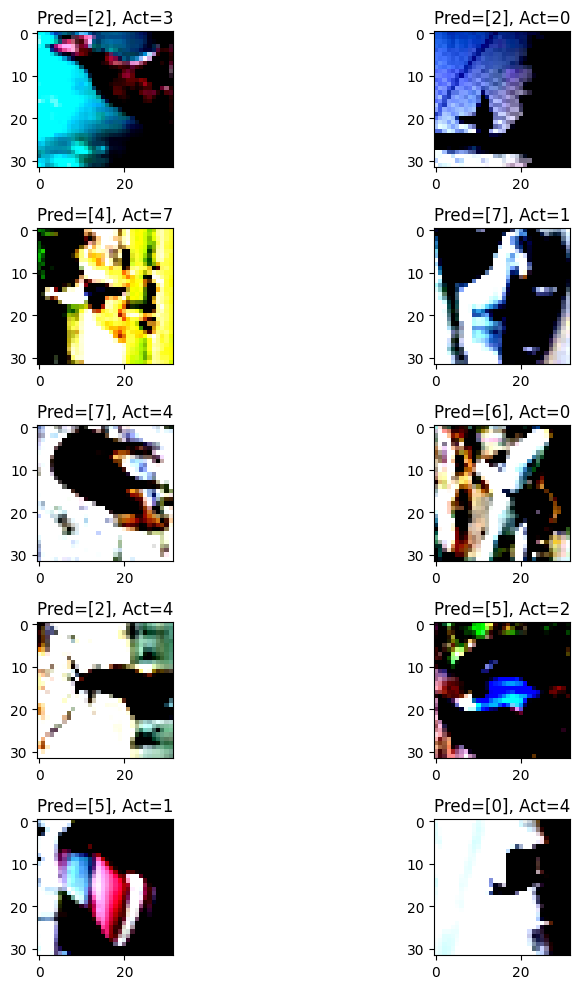

In [9]:
plot_misclassified_images()

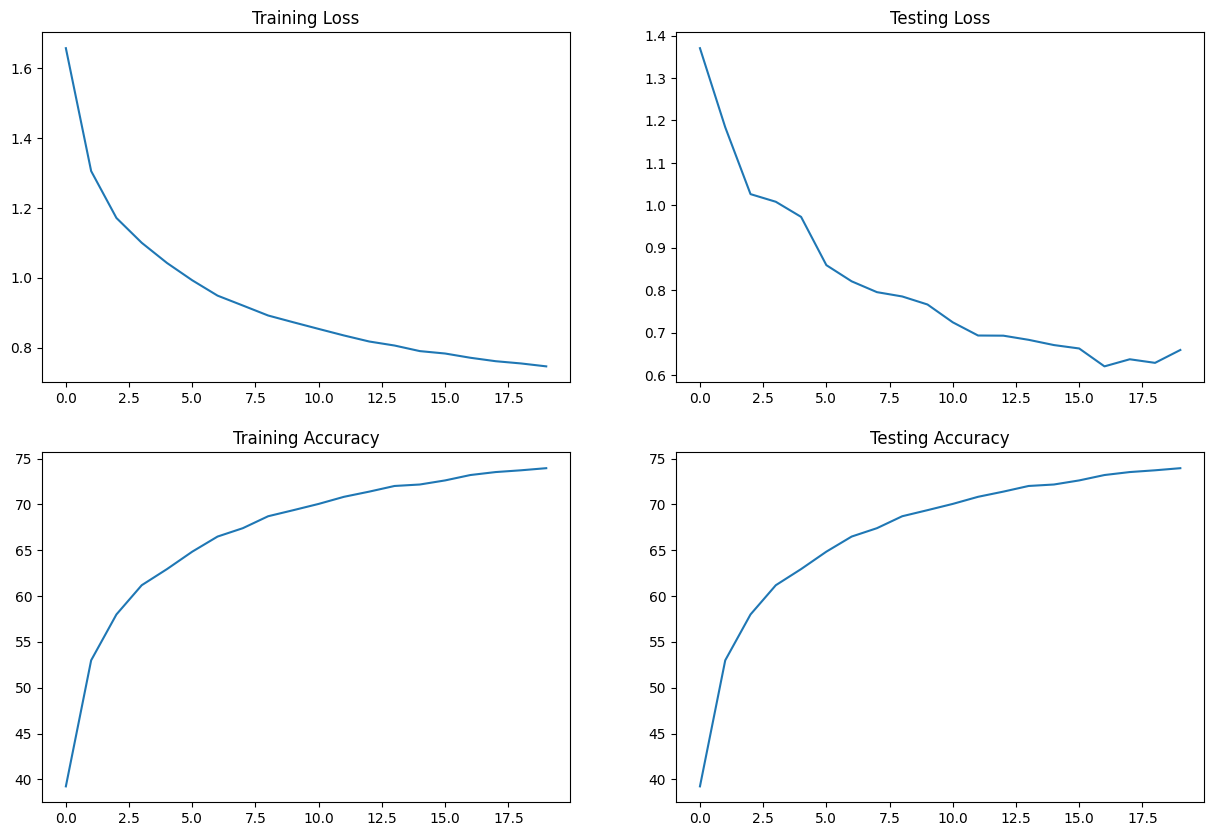

In [10]:
draw_graphs()